In [ ]:
# I want to load tif files from a folder one by one.
# Each files is a annotation
# I want to see if there is any annotaiton there, or just a blank image
# A list will be created to store the file names of the blank images
# The blank images and annotated images will be saved in two different folders
# The tissue parchse corresponding to the blank images and non-blank images will be saved in two different folders
# The link between annotaiton image and the tissue path image is their file name.


In [ ]:
import os
import numpy as np
from PIL import Image
from shutil import copyfile
from tqdm import tqdm

# Define the directories
annotations_dir = r'D:\Data\tls-data\patched-data\gt'
tissue_images_dir = r'D:\Data\tls-data\patched-data\patches'
blank_annotations_dir = r'D:\Data\tls-data\patched-data\separated\blank_annotations'
blank_tissue_images_dir = r'D:\Data\tls-data\patched-data\separated\blank_tissue_images'
annotated_annotations_dir = r'D:\Data\tls-data\patched-data\separated\ann_annotations'
annotated_tissue_images_dir = r'D:\Data\tls-data\patched-data\separated\ann_tissue_images'

# Create output directories if they don't exist
os.makedirs(blank_annotations_dir, exist_ok=True)
os.makedirs(blank_tissue_images_dir, exist_ok=True)
os.makedirs(annotated_annotations_dir, exist_ok=True)
os.makedirs(annotated_tissue_images_dir, exist_ok=True)

# Create lists to store the file names
blank_annotations = []
annotated_annotations = []
# Get the list of annotation files
annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.tif')]

# Load annotation tif files one by one with progress tracking
for filename in tqdm(annotation_files, desc="Processing files"):
    try:
        # Load the annotation image
        annotation_path = os.path.join(annotations_dir, filename)
        annotation_img = Image.open(annotation_path)
        # Convert the annotation image to a numpy array
        annotation_array = np.array(annotation_img)

        # Check if the annotation image is blank (i.e., all zeros)
        if np.all(annotation_array == 0):
            # Save the annotation image in the blank annotations directory
            annotation_img.save(os.path.join(blank_annotations_dir, filename))
            # Add the filename to the blank annotations list
            blank_annotations.append(filename)
            # Copy the corresponding tissue image to the blank tissue images directory
            tissue_filename = filename  # assuming the filenames are identical
            tissue_path = os.path.join(tissue_images_dir, tissue_filename)
            if os.path.exists(tissue_path):
                copyfile(tissue_path, os.path.join(blank_tissue_images_dir, tissue_filename))
        else:
            # Save the annotation image in the annotated annotations directory
            annotation_img.save(os.path.join(annotated_annotations_dir, filename))
            # Add the filename to the annotated annotations list
            annotated_annotations.append(filename)
            # Copy the corresponding tissue image to the annotated tissue images directory
            tissue_filename = filename  # assuming the filenames are identical
            tissue_path = os.path.join(tissue_images_dir, tissue_filename)
            if os.path.exists(tissue_path):
                copyfile(tissue_path, os.path.join(annotated_tissue_images_dir, tissue_filename))
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Print the file names of the blank annotations
print('Blank annotations:', blank_annotations)


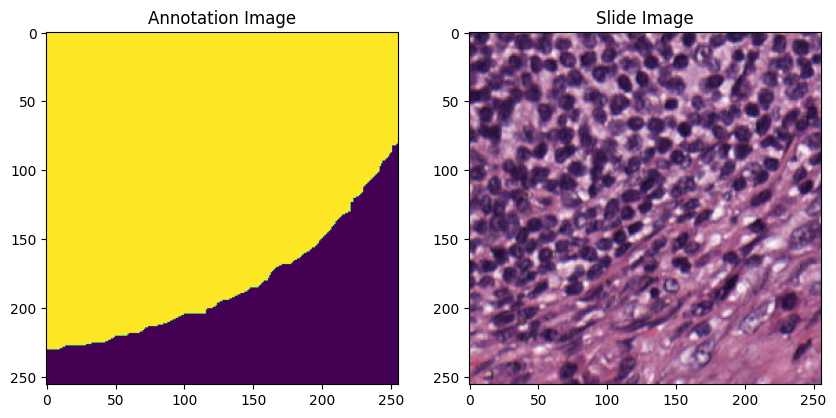

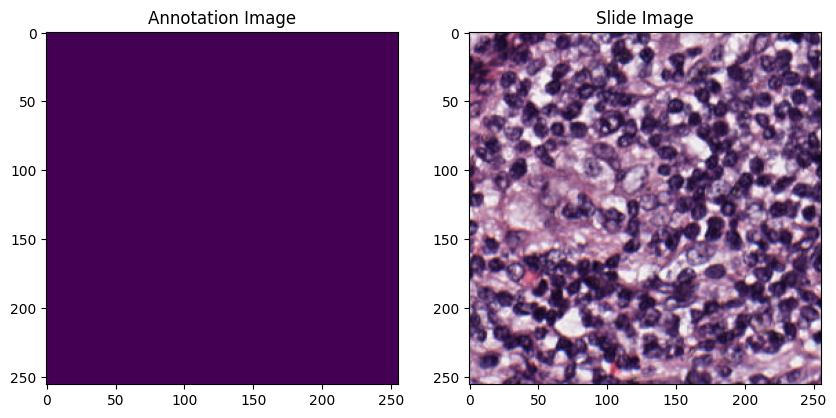

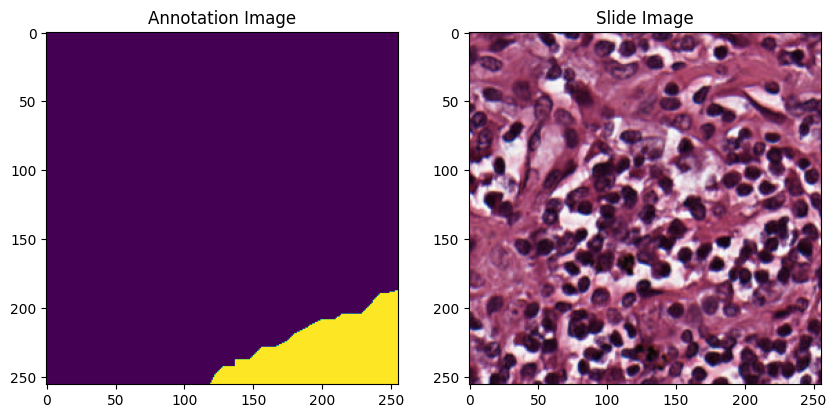

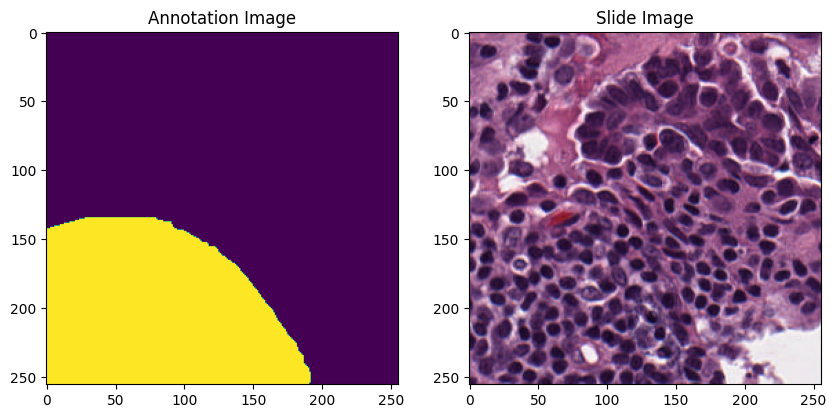

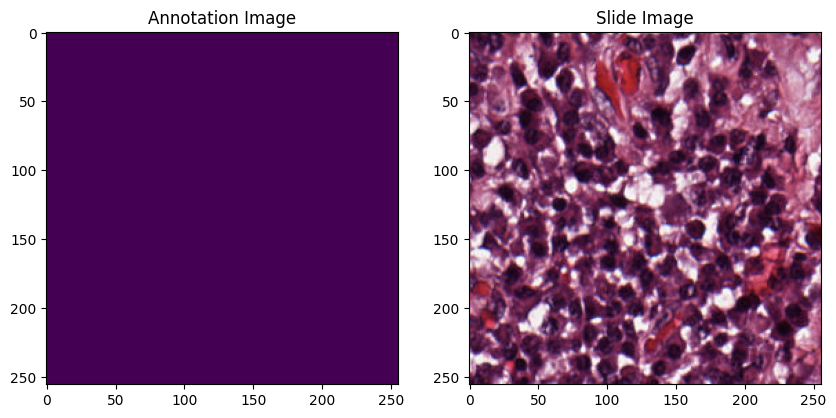

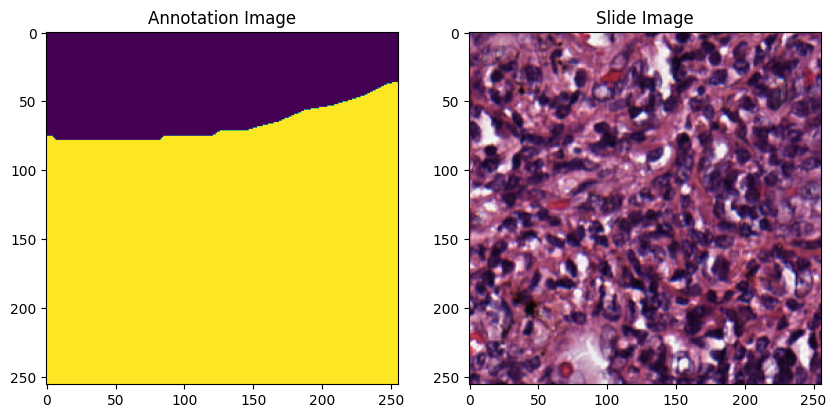

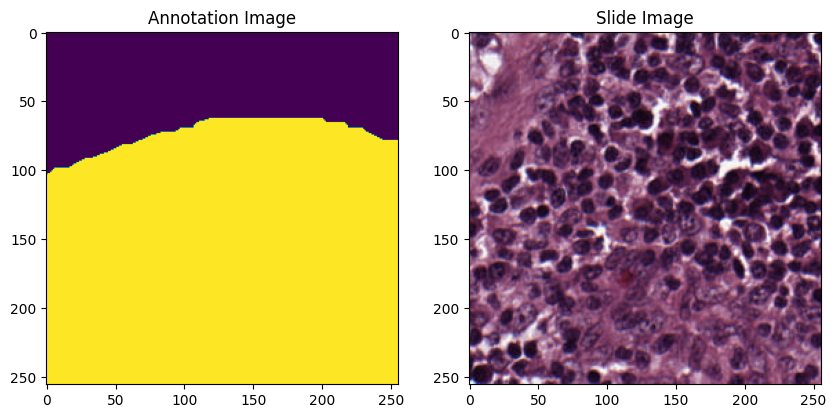

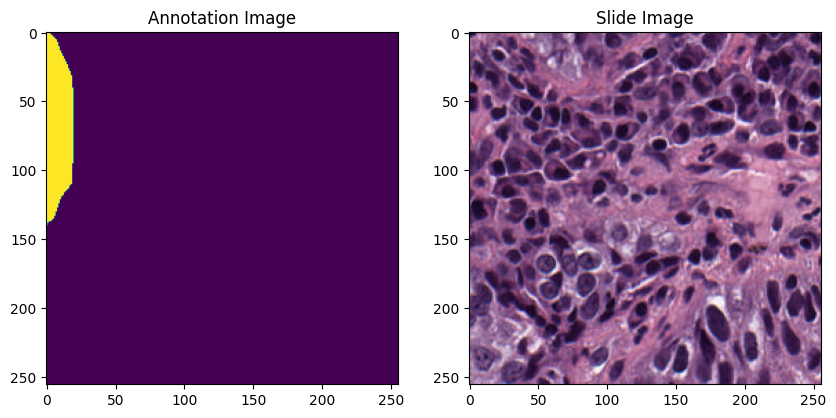

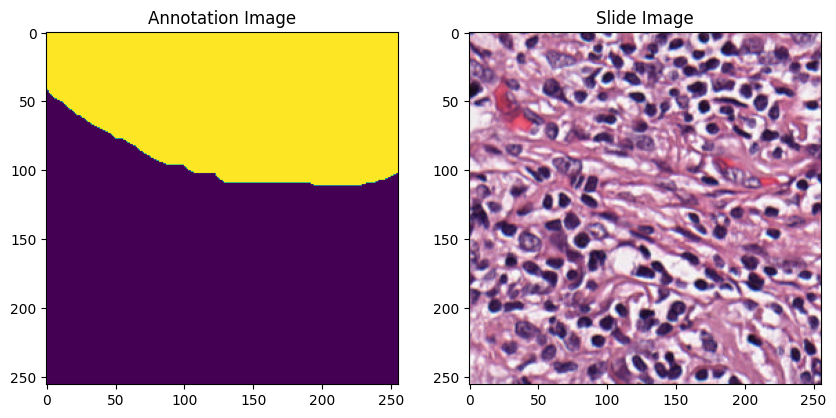

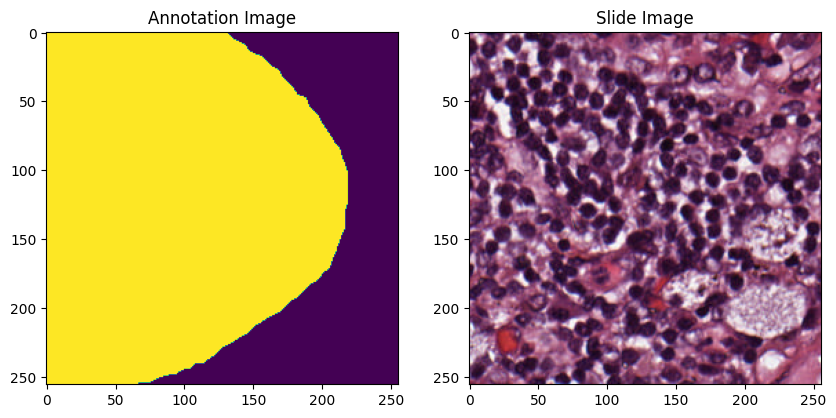

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the directories
dir1 = r'D:\Data\tls-data\patched-data\separated\ann_annotations'
dir2 = r'D:\Data\tls-data\patched-data\separated\ann_tissue_images'

# Get a list of all tif files in the first directory
files = [f for f in os.listdir(dir1) if f.endswith('.tif')]

# Do this 10 times
for _ in range(10):
    # Select a tif file randomly
    filename = random.choice(files)

    # Open the file from the first directory
    img1 = Image.open(os.path.join(dir1, filename))

    # Open the file with the same name from the second directory
    img2 = Image.open(os.path.join(dir2, filename))

    # Display both images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Annotation Image')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Slide Image')

    plt.show()